# Homework 9

---

## Problem Setup

The objective of this homework is to perform low-rank approximation on the data generated by simulating an incompressible flow over a cylinder. We assume the flow is incompressible and therefore it is governed by incompressible Navier-Stokes equations given by:

$$
\begin{align}
  \frac{\partial u_{x}}{\partial t} + u_{x}\frac{\partial u_{x}}{\partial x} + 
  u_{y}\frac{\partial u_{x}}{\partial y} &= -\frac{\partial p}{\partial x} + 
  \frac{1}{\text{Re}}\bigg(\frac{\partial^{2} u_{x}}{\partial x^{2}} + 
  \frac{\partial^{2} u_{x}}{\partial y^{2}}\bigg) \\ \\
  \frac{\partial u_{y}}{\partial t} + u_{x}\frac{\partial u_{y}}{\partial x} + 
  u_{y}\frac{\partial u_{y}}{\partial y} &= -\frac{\partial p}{\partial y} + 
  \frac{1}{\text{Re}}\bigg(\frac{\partial^{2} u_{y}}{\partial x^{2}} + 
  \frac{\partial^{2} u_{y}}{\partial y^{2}}\bigg) \\ \\
  \frac{\partial u_{x}}{\partial x} + \frac{\partial u_{y}}{\partial y} &= 0
\end{align}
$$

where $\mathbf{u}(x, y, t) = u_{x}(x, y, t)\mathbf{i} + u_{y}(x, y, t)\mathbf{j}$ is the velocity vector field, $p(x, y, t)$ is the pressure field and $\text{Re} = \rho V_{\infty}D/\mu$ is the Reynolds number, where $\rho$ is the density, $V_{\infty}$ is free-stream velocity, and $D$ is the cylinder diameter. The first two equations represent the conservation of x-momentum and y-momentum, respectively, while the last equation is the conservation of mass. The equations presented are in nondimensional form, and all quantities appearing in the equations are nondimensional.  You do not need to use any of these equations for the following calculations.  They are provided solely introduce the notation.

## Data

For the purpose of this assignment, the above equations were solved using the spectral element method.  The snapshots of the numerical simulation of the Navier-Stokes equations for flow over a cylinder at $\text{Re} = 100$ can be found in `CYLINDER.mat`, which includes:

- `nx`: the number of mesh points in the $x$ direction.
- `ny`: the number of mesh points in the $y$ direction.
- `X`: the matrix of $x$ coordinates of the mesh points. The size of the matrix is `ny` by `nx`.
- `Y`: the matrix of $y$ coordinates of the mesh points. The size of the matrix is `ny` by `nx`.
- `dx` and `dy`: The $\Delta x$ and $\Delta y$ of the mesh points, respectively.
- `Ux`: the matrix of snapshots of $u_{x}$ velocity. The size of the matrix is `nx.ny` by `nt`, where `nx.ny` is the total number of mesh poitns and `nt` is the number of time shapshots.

The snapshots of matrix U and V are the numerical solutions of the Navier-Stokes equations $u_{x}(x, y, l_{k})$ and $u_{y}(x, y, t_{k})$ with $k = 1, \ldots, \text{nt}$ and $t_{k} = (k - 1)\Delta t$, where $\Delta t = 0.2$.

## Code

Two auxiliary M-Files are available:

-`drive.m`: This M-file calls and plots $u_{x}(x, y, t)$ in a time loop
-`DEIM.m`: This function returns the Discrete Empirical Interpolation Method (DEIM) indices based on the QR algorithm.

In this assignment, you will only use the $U_{x}$ matrix as the data source.

## Problem 1 (Low-Rank Approximation with SVD)

1. Compute the POD mdoes and plot the first five POD modes. Use `svd(Ux,'econ')` for faster computation. Let $\hat{U}_{x}$ denote the rank-$r$ approximation of $U_{x}$.

2. In this part, we need to compute the data compression achieved by using SVD. To this end, store the rank-$r$ matrix $\hat{U}_{x}$ in the factorized form: $\hat{U}_{x} = U \Sigma V^{T}$, where you only need to store $U$, $\Sigma$, and $V$ matrices. Store these three matrices in a mat file. Also, store the full-rank matrix $U_{x}$ in a mat file. Perform this operation for rank $r = [5, 10, 15]$. Plot the size of these files versus $r$. Plot the compression ratio for all these low-rank approximations.

```{figure} figure1.png
:label:fomSol
:align: center

The contours of the $\frac{\partial u}{\partial y}$ for flow over cylinder at $\text{Re} = 100$.
```

3. Let the relative error be defined as:

$$
e(r) = \frac{\lVert U_{x} - \hat{U}_{x} \rVert_{F}}{\lVert U_{x} \rVert_{F}}
$$

where $\lVert \cdot \rVert_{F}$ is the Frobenius norm.

Plot $e(r)$ versus $r$ for $r = [5, 10, 15]$. Use `semilogy`. Also, plot $e(r)$ versus the storage size.

### Load the data

In [58]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = scipy.io.loadmat('cylinder.mat')
Ux = data['Ux']
X = data['X']
Y = data['Y']
dx = float(data['dx'][0, 0])
dy = float(data['dy'][0, 0])
nt = int(data['nt'][0, 0])
nx = int(data['nx'][0, 0])
ny = int(data['ny'][0, 0])

# Create a dataframes
Ux_df = pd.DataFrame(Ux)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

### Display the data

In [36]:
# Display the first few rows of each DataFrame
print("\nUx DataFrame:")
Ux_df.head()


Ux DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.019202,1.019393,1.019395,1.019207,1.018840,1.018311,1.017646,1.016878,1.016043,1.015183,...,1.011987,1.011714,1.011627,1.011732,1.012023,1.012487,1.013103,1.013839,1.014659,1.015523
1,1.018985,1.019175,1.019174,1.018982,1.018608,1.018073,1.017400,1.016624,1.015781,1.014913,...,1.011697,1.011424,1.011340,1.011448,1.011745,1.012216,1.012839,1.013584,1.014412,1.015284
2,1.018759,1.018948,1.018943,1.018746,1.018367,1.017825,1.017145,1.016360,1.015509,1.014634,...,1.011397,1.011125,1.011043,1.011156,1.011459,1.011937,1.012567,1.013320,1.014156,1.015036
3,1.018524,1.018711,1.018703,1.018502,1.018117,1.017567,1.016879,1.016087,1.015228,1.014345,...,1.011089,1.010817,1.010738,1.010855,1.011163,1.011648,1.012286,1.013046,1.013891,1.014779
4,1.018278,1.018464,1.018453,1.018247,1.017856,1.017299,1.016604,1.015804,1.014937,1.014046,...,1.010771,1.010500,1.010423,1.010544,1.010858,1.011349,1.011995,1.012764,1.013617,1.014512


In [37]:
print("\nX DataFrame:")
X_df.head()


X DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-2.0,-1.98,-1.96,-1.94,-1.92,-1.9,-1.88,-1.86,-1.84,-1.82,...,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.0
1,-2.0,-1.98,-1.96,-1.94,-1.92,-1.9,-1.88,-1.86,-1.84,-1.82,...,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.0
2,-2.0,-1.98,-1.96,-1.94,-1.92,-1.9,-1.88,-1.86,-1.84,-1.82,...,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.0
3,-2.0,-1.98,-1.96,-1.94,-1.92,-1.9,-1.88,-1.86,-1.84,-1.82,...,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.0
4,-2.0,-1.98,-1.96,-1.94,-1.92,-1.9,-1.88,-1.86,-1.84,-1.82,...,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.0


In [38]:
print("\nY DataFrame:")
Y_df.head()


Y DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,...,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50,-2.50
1,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,...,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48,-2.48
2,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,...,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46,-2.46
3,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,...,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44,-2.44
4,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,...,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42,-2.42


### Visualize the data

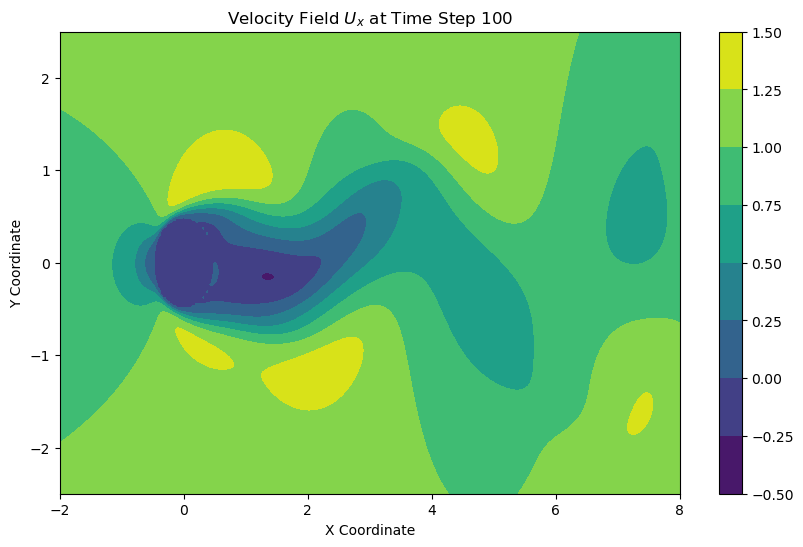

In [54]:
# Plot the velocity field Ux at the first time step
plt.figure(figsize=(10, 6))
plt.contourf(X_df, Y_df, Ux_df.iloc[:, 99].values.reshape(nx, -1).T, cmap='viridis')
plt.colorbar()
plt.title('Velocity Field $U_x$ at Time Step 100')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

### Compute SVD

In [132]:
U, Sigma, VT = np.linalg.svd(Ux, full_matrices=False)

### Plot the first five POD Modes

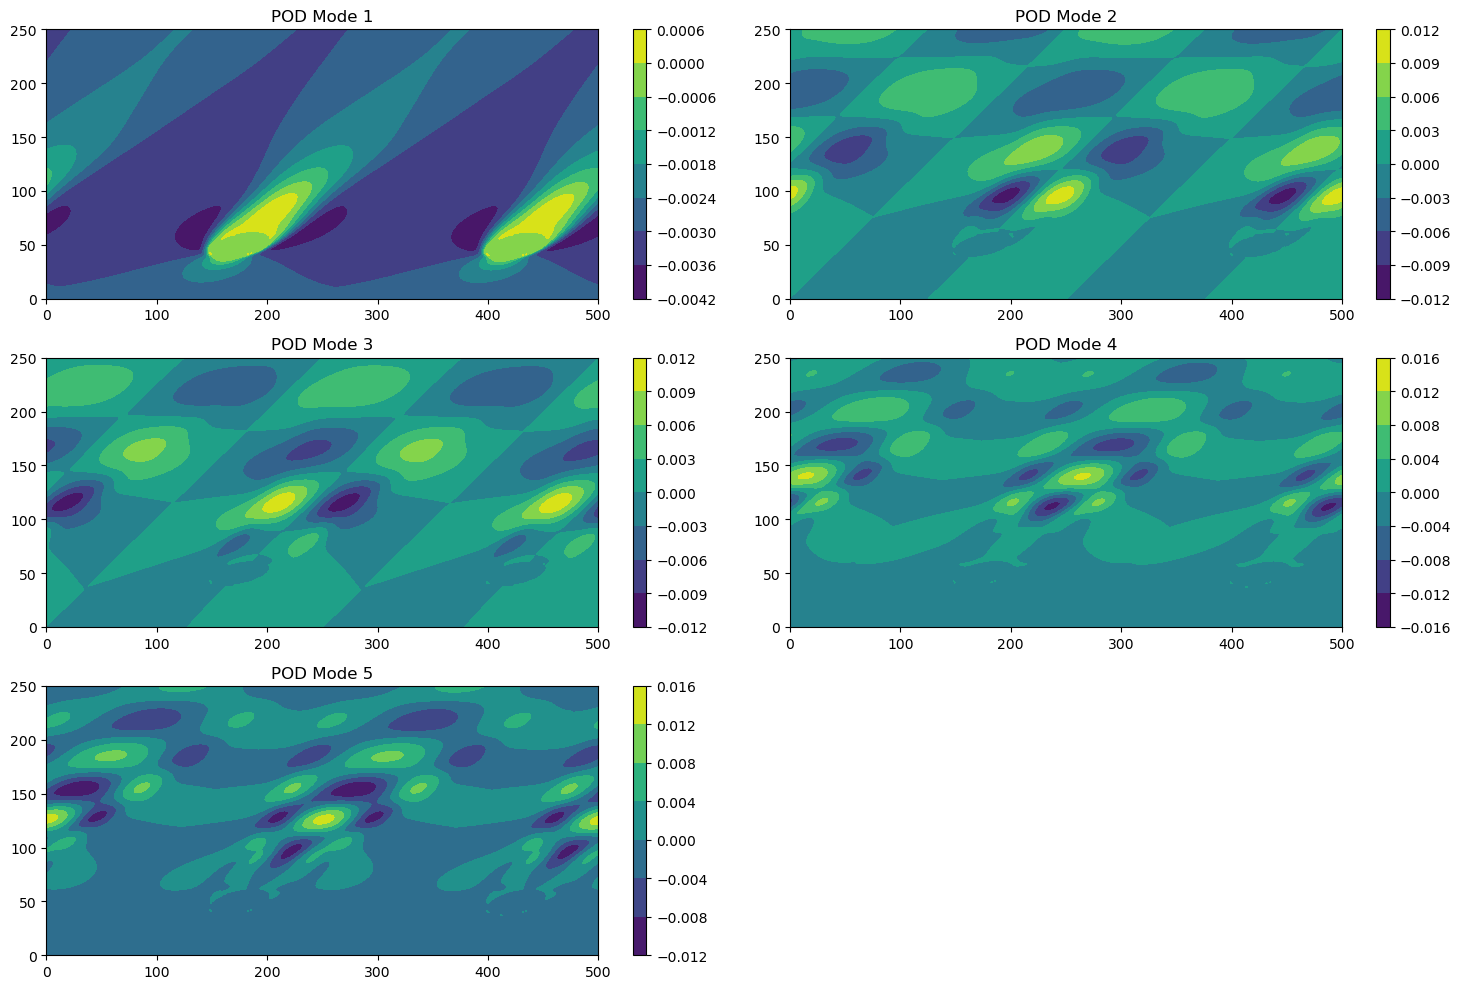

In [105]:
plt.figure(figsize=(15, 10))

for i in range(5):
    mode_shape = U[:, i].reshape(ny, nx)
    plt.subplot(3, 2, i+1)
    plt.contourf(mode_shape, cmap='viridis')
    plt.colorbar()
    plt.title(f'POD Mode {i+1}')

plt.tight_layout()
plt.show()

### Rank-$r$ $\hat{U}_{x}$ Comparisons

#### $U_{x}$ Matrix

In [94]:
import os
from numpy.linalg import norm

# Save the original Ux as a CSV to measure its size
name = 'Ux_full.mat'
scipy.io.savemat(name, {'Ux': Ux})
Ux_size = os.path.getsize(name)

# Calculate the error
Ux_hat = Ux
error = norm(Ux - Ux_hat, 'fro') / norm(Ux, 'fro')
Ux_error = error
Ux_CR = 1

#### Rank 5

In [110]:
import scipy.sparse as sp

# Calculate Ux_hat for given rank
r = 5
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
VT_r = VT[:r, :]
Ux_hat = U_r @ Sigma_r @ VT_r
Ux_hat_sparse = sp.csr_matrix(Ux_hat)

# Save as a CSV to measure its size
name = 'Ux_5.mat'
scipy.io.savemat(name, {
    'U_r': U_r,
    'Sigma_r': Sigma_r,
    'VT_r': VT_r
})
Ux_hat_5_size = os.path.getsize(name)

# Calculate the error
error = norm(Ux - Ux_hat, 'fro') / norm(Ux, 'fro')
Ux_hat_5_error = error
Ux_hat_5_CR = Ux_size / Ux_hat_5_size

#### Rank 10

In [112]:
# Calculate Ux_hat for given rank
r = 10
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
VT_r = VT[:r, :]
Ux_hat = U_r @ Sigma_r @ VT_r

# Create a dataframes
Ux_hat_df = pd.DataFrame(Ux_hat)

# Save as a CSV to measure its size
name = 'Ux_10.mat'
scipy.io.savemat(name, {
    'U_r': U_r,
    'Sigma_r': Sigma_r,
    'VT_r': VT_r
})
Ux_hat_10_size = os.path.getsize(name)

# Calculate the error
error = norm(Ux - Ux_hat, 'fro') / norm(Ux, 'fro')
Ux_hat_10_error = error
Ux_hat_10_CR = Ux_size / Ux_hat_10_size

#### Rank 15

In [114]:
# Calculate Ux_hat for given rank
r = 15
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
VT_r = VT[:r, :]
Ux_hat = U_r @ Sigma_r @ VT_r

# Create a dataframes
Ux_hat_df = pd.DataFrame(Ux_hat)

# Save as a CSV to measure its size
name = 'Ux_15.mat'
scipy.io.savemat(name, {
    'U_r': U_r,
    'Sigma_r': Sigma_r,
    'VT_r': VT_r
})
Ux_hat_15_size = os.path.getsize(name)

# Calculate the error
error = norm(Ux - Ux_hat, 'fro') / norm(Ux, 'fro')
Ux_hat_15_error = error
Ux_hat_15_CR = Ux_size / Ux_hat_15_size

#### Report the Results

In [118]:
ranks = [250, 5, 10, 15]
file_sizes = [Ux_size, Ux_hat_5_size, Ux_hat_10_size, Ux_hat_15_size]
errors = [Ux_error, Ux_hat_5_error, Ux_hat_10_error, Ux_hat_15_error]
CRs = [Ux_CR, Ux_hat_5_CR, Ux_hat_10_CR, Ux_hat_15_CR]

results_df = pd.DataFrame({
    'Rank': ranks,
    'File Size (bytes)': file_sizes,
    'Error': errors,
    'Compression Ratio': CRs
})

results_df

,Rank,File Size (bytes),Error,Compression Ratio
0,250,251502184,0.000000,1.000000
1,5,5040544,0.013005,49.895841
2,10,10081184,0.001615,24.947683
3,15,15122224,0.000222,16.631296


#### Visualize the Results

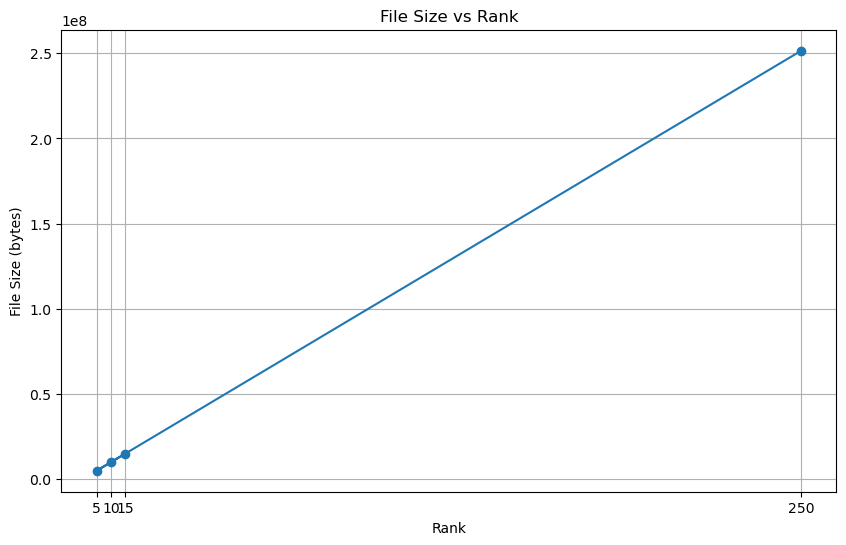

In [121]:
# File size vs. rank
plt.figure(figsize=(10, 6))
plt.plot(results_df['Rank'], results_df['File Size (bytes)'], marker='o', linestyle='-')
plt.title('File Size vs Rank')
plt.xlabel('Rank')
plt.ylabel('File Size (bytes)')
plt.grid(True)
plt.xticks(results_df['Rank'])  # Set x-ticks to be exactly the ranks used
plt.show()

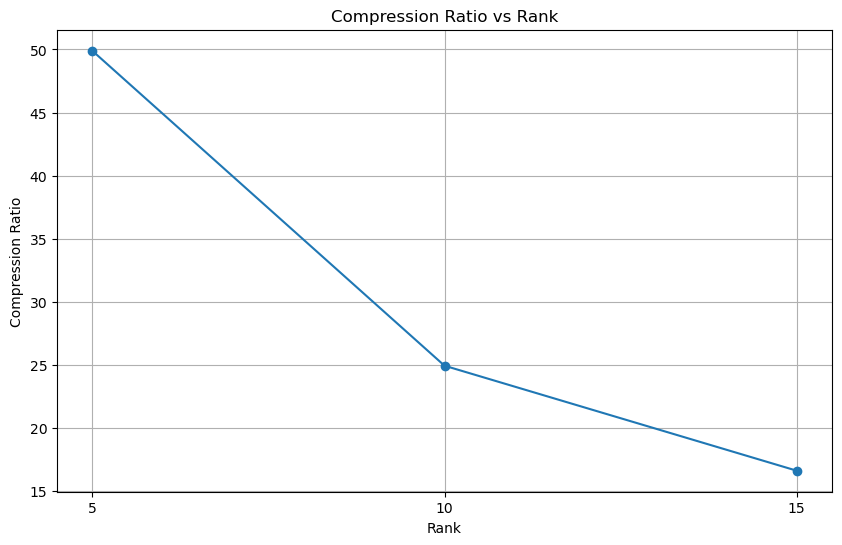

In [124]:
# Compression ratio vs. Rank
plt.figure(figsize=(10, 6))
plt.plot(results_df['Rank'].iloc[1:4], results_df['Compression Ratio'].iloc[1:4], marker='o', linestyle='-')
plt.title('Compression Ratio vs Rank')
plt.xlabel('Rank')
plt.ylabel('Compression Ratio')
plt.grid(True)
plt.xticks(results_df['Rank'].iloc[1:4])  # Set x-ticks to be exactly the ranks used
plt.show()

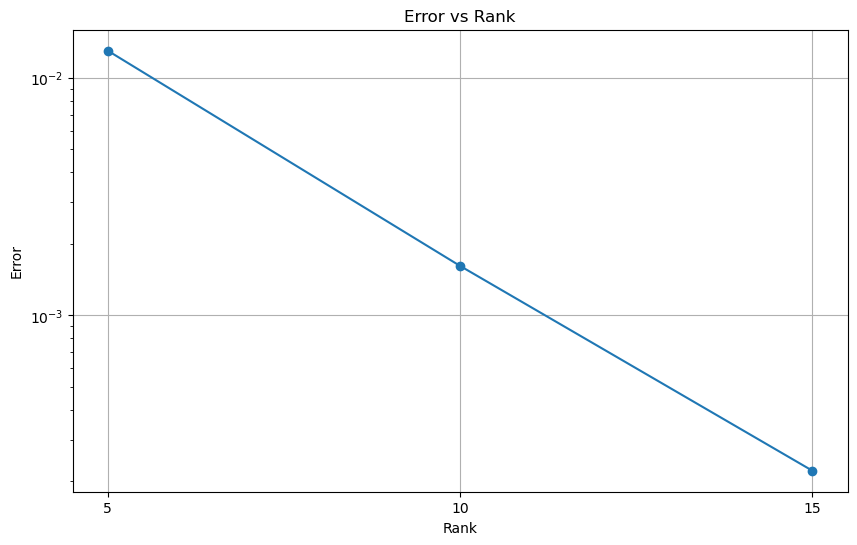

In [126]:
# Error vs. Rank
plt.figure(figsize=(10, 6))
plt.semilogy(results_df['Rank'].iloc[1:4], results_df['Error'].iloc[1:4], marker='o', linestyle='-')
plt.title('Error vs Rank')
plt.xlabel('Rank')
plt.ylabel('Error')
plt.grid(True)
plt.xticks(results_df['Rank'].iloc[1:4])  # Set x-ticks to be exactly the ranks used
plt.show()

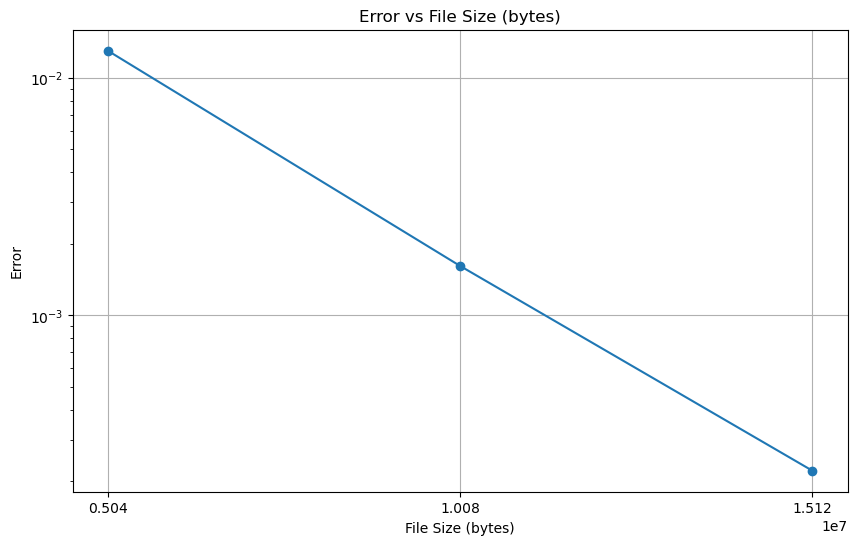

In [129]:
# Error vs. storage size
plt.figure(figsize=(10, 6))
plt.semilogy(results_df['File Size (bytes)'].iloc[1:4], results_df['Error'].iloc[1:4], marker='o', linestyle='-')
plt.title('Error vs File Size (bytes)')
plt.xlabel('File Size (bytes)')
plt.ylabel('Error')
plt.grid(True)
plt.xticks(results_df['File Size (bytes)'].iloc[1:4])  # Set x-ticks to be exactly the ranks used
plt.show()

## Problem 2 (Low-Rank Approximation with Optimal CUR)

1. Write a code to compute the rank-$r$ approximation of $U_{x}$ using optimal CUR, where the exact left and right singular vectors of $U_{x}$ are used to determine the DEIM indices. Visualize the sensor location (row indices) for $r=5$ on a contour plot of $U_{x}$ at $l=0$.

In [133]:
def deim(U):
    """ Compute the DEIM indices for matrix U (columns are the modes) """
    p = np.zeros(U.shape[1], dtype=int)
    p[0] = np.argmax(np.abs(U[:, 0]))  # Get the index of the max abs value in the first column
    for i in range(1, U.shape[1]):
        r = U[:, i] - U[:, :i] @ np.linalg.lstsq(U[p[:i], :i], U[p[:i], i], rcond=None)[0]
        p[i] = np.argmax(np.abs(r))  # Get the index of the max abs value in the residual
    return p

# Load the data if not already loaded
data = scipy.io.loadmat('cylinder.mat')
Ux = data['Ux']
X = data['X']
Y = data['Y']

# Assume U, Sigma, VT are already computed from SVD
r = 5
U_r = U[:, :r]
VT_r = VT[:r, :]

# Get DEIM indices for columns and rows
col_indices = deim(U_r)
row_indices = deim(VT_r.T)

# Extract C, U, and R matrices for CUR decomposition
C = Ux[:, col_indices[:r]]
R = Ux[row_indices[:r], :]
U = np.linalg.pinv(C[row_indices[:r], :])  # Intersection

# Reconstruct the low-rank approximation
Ux_hat = C @ U @ R

# Plot sensor locations on the first snapshot of Ux
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Ux[:, 0].reshape(X.shape), cmap='viridis', levels=100)
plt.scatter(X.flatten()[row_indices[:r]], Y.flatten()[row_indices[:r]], color='r', label='Sensor Locations')
plt.colorbar()
plt.title('Sensor Locations on Ux at l=0 with Rank-5 CUR')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


IndexError: index 26773 is out of bounds for axis 1 with size 250